In [2]:
# Imports go here
import os
from PIL import Image
import matplotlib.gridspec as gridspec
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
from matplotlib import pyplot as plt
import tensorflow.keras as keras
import tensorflow as tf
from keras import regularizers
from keras.layers import Dense, Flatten, Input
from keras.models import Sequential
from keras.utils import to_categorical

from dl_utils import plot_history

## Load in data and put in correct shape
Only run if you do not yet have the datafiles

In [ ]:
def extract_data(path):
    X_array = list()
    y_array = list()
    # Loop over all files in the directory
    for folder in os.listdir(path):
        # Check if the file is a directory
        if os.path.isdir(path + "\\" + folder):
            # Loop over all files in the subdirectory
            for file in os.listdir(path + "\\" + folder):
                # Import image and rescale it
                X_array.append(np.asarray(Image.open(path + "\\" + folder + "\\" + file)) / 255)
                y_array.append(folder)
    return np.asarray(X_array), np.asarray(y_array)

In [ ]:
# Extract data from the folders
X_test, y_test = extract_data("C:\\Users\\Victo\\Desktop\\University\\2024-25\\DL\\DeepLearning\\Assignment1\\test_data\\test")
X_train, y_train = extract_data("C:\\Users\\Victo\\Desktop\\University\\2024-25\\DL\\DeepLearning\\Assignment1\\training_data\\train")

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:\\Users\\Victo\\Desktop\\University\\2024-25\\DL\\DeepLearning\\Assignment1\\test_data\\test'

In [ ]:
# Save the data
np.save("X_test.npy", X_test)
np.save("y_test.npy", y_test)
np.save("X_train.npy", X_train)
np.save("y_train.npy", y_train)

## Look at the data

In [3]:
# Load the data
X_test, y_test = np.load("X_test.npy"), np.load("y_test.npy")
X_train, y_train = np.load("X_train.npy"), np.load("y_train.npy")

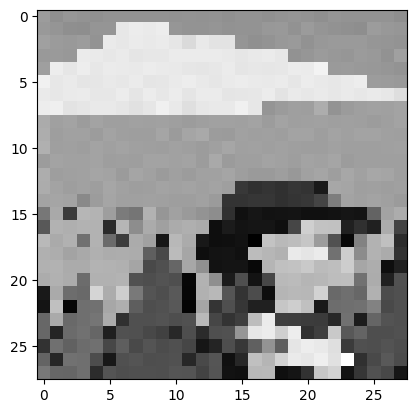

Label = bart_simpson


In [ ]:
# Plot the first image
plt.imshow(X_train[0], cmap="gray")
plt.show()
print("Label =", y_train[0])

## Put data in correct form

Encoding the data using dictionaries so we can convert the back to the labels after prediction on new data. For example, this allows us to have a more informative confusion matrix since we can use the names of the characters instead of the 0-9 labels.

In [4]:
# Convert names to numbers
convert_dict = {'bart_simpson' : 0,
                'charles_montgomery_burns' : 1,
                'homer_simpson' : 2,
                'krusty_the_clown' : 3,
                'lisa_simpson' : 4,
                'marge_simpson' : 5,
                'milhouse_van_houten' : 6,
                'moe_szyslak' : 7,
                'ned_flanders' : 8,
                'principal_skinner' : 9}

inverse_convert_dict = {0 : 'bart_simpson',
                1 : 'charles_montgomery_burns',
                2 : 'homer_simpson',
                3 : 'krusty_the_clown',
                4 : 'lisa_simpson',
                5 : 'marge_simpson',
                6 : 'milhouse_van_houten',
                7 : 'moe_szyslak',
                8 : 'ned_flanders',
                9 : 'principal_skinner'}

y_train = np.array([convert_dict[i] for i in y_train])
y_test = np.array([convert_dict[i] for i in y_test])

num_classes = 10

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

print("First label is now = ", y_train[0])

First label is now =  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [5]:
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

# Train validation split
X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)


print(X_train.shape[0], "train samples")
print(X_val.shape[0], "validation samples")
print(X_test.shape[0], "test samples")

6400 train samples
1600 validation samples
2000 test samples


## Define the MLP model

In [54]:
def MLPModel(num_classes, lr=0.01, hidden_dimension=[8,8], L2=0, activation="relu"):
    model = Sequential()
    model.add(Input(shape=(28, 28)))
    model.add(Flatten())
    for hd in hidden_dimension:
        model.add(Dense(hd, kernel_regularizer=regularizers.L2(L2), activation=activation))
    model.add(Dense(num_classes, activation="softmax"))
    optimizer = keras.optimizers.AdamW(learning_rate=lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
    return model

### Step 1

In a first iteration a simple MLP with 2 hidden layers each of dimension 8 was tested. It was clear that the model needed a bit more complexity as the accuracy on the validation set gets stuck below 25%. This can be seen from running the following code:

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_22 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_63 (Dense)                     │ (None, 8)                   │           6,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_64 (Dense)                     │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_65 (Dense)                     │ (None, 10)                  │              90 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,442 (25.16 KB)

 Trainable params: 6,442 (25.16 KB)

 Non-trainable params: 0 (0.00 B)

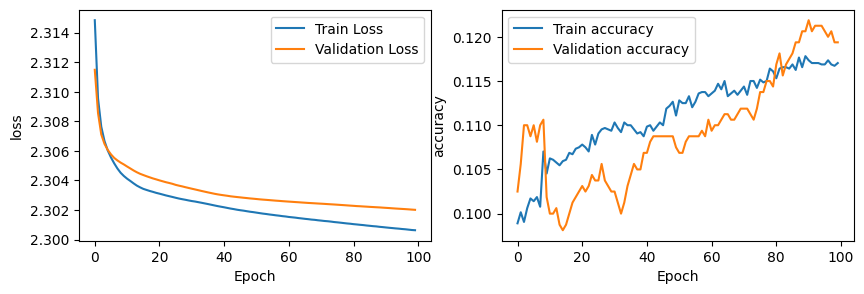

In [51]:
model1 = MLPModel(num_classes, hidden_dimension=[8, 8], lr=0.001)
model1.summary()
batch_size = 128
epochs = 100

history1 = model1.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=0, validation_data=(X_val, y_val), shuffle=True)
plot_history(history1)

### Step 2

In this step we made the model more complex, we decided for a funnel like model with larger hidden dimensions at the beginning and smaller towards the end. We experimented with more hidden layers but this lead to models that were too complex for the given task. It is clear from the validation training graphs that the model needs some regularization. The model does however breach the 25% treshold.

Also during this, we tuned the other parameters: learning rate, batch size, epochs, activation function, optimizer.

LR: with other learning rates the variance can be lowered, but the best avarage accuracy when fiting the model was observed with lr=0.001, we can later lower the variance with regularization

Batch size: changing this didn't affect the models performance that much when fitting the model a few times with each sizes, but we didn't go higher to stay true to stochasticity.

Epochs: with lower epochs the performance of the model is slightly worse, with higher it overfits

Activation: Elu could be good if Relu causes dead neurons, but here it just makes the variance higher, the weights don't seem to disappear

Optimizer: The model can perform better with Adam then with SGD, but we also have to have lower learning rate with Adam. AdamW can also perform a little better than Adam, but not that much in terms of accuracy, but can lower the variance a little later, due to handling L2 regularization better.

Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_29 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_84 (Dense)                     │ (None, 32)                  │          25,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_85 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_86 (Dense)                     │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,818 (100.85 KB)

 Trainable params: 25,818 (100.85 KB)

 Non-trainable params: 0 (0.00 B)

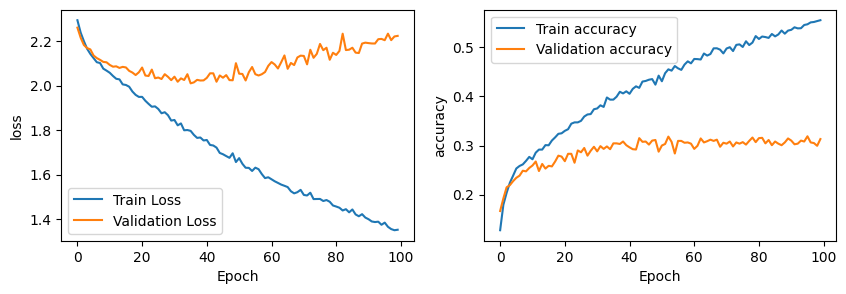

In [65]:
model2 = MLPModel(num_classes, hidden_dimension=[32, 16], lr=0.001, activation="relu")
model2.summary()
batch_size = 128
epochs = 100

history2 = model2.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=0, validation_data=(X_val, y_val), shuffle=True)
plot_history(history2)

In [66]:
score = model2.evaluate(X_test, y_test, verbose=0)

print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 2.1875064373016357
Test accuracy: 0.3269999921321869


### Step 3

In this step we added L2 regularization in order to deal with the excessive overfitting. Some overfitting is still present, but from trying different hyperparameters we concluded that allowing a bit of overfitting lead to better performance of the model.



Model: "sequential_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_32 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_93 (Dense)                     │ (None, 32)                  │          25,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_94 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_95 (Dense)                     │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,818 (100.85 KB)

 Trainable params: 25,818 (100.85 KB)

 Non-trainable params: 0 (0.00 B)

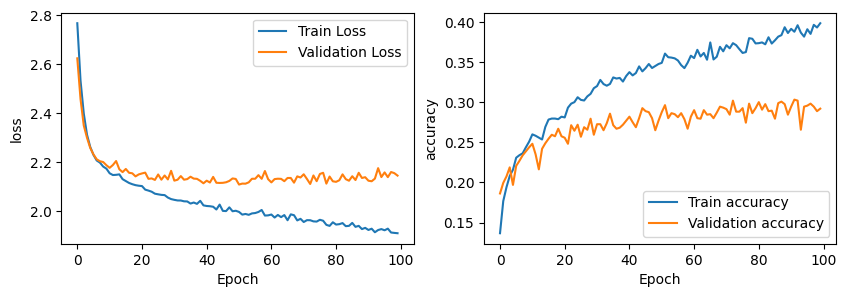

In [96]:
model3 = MLPModel(num_classes, hidden_dimension=[32, 16], lr=0.001, L2=0.0075)
model3.summary()
batch_size = 128
epochs = 100

history3 = model3.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=0, validation_data=(X_val, y_val), shuffle=True)
plot_history(history3)

## Evaluation of the model

In [97]:
score = model3.evaluate(X_test, y_test, verbose=0)

print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 2.129133939743042
Test accuracy: 0.30250000953674316


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


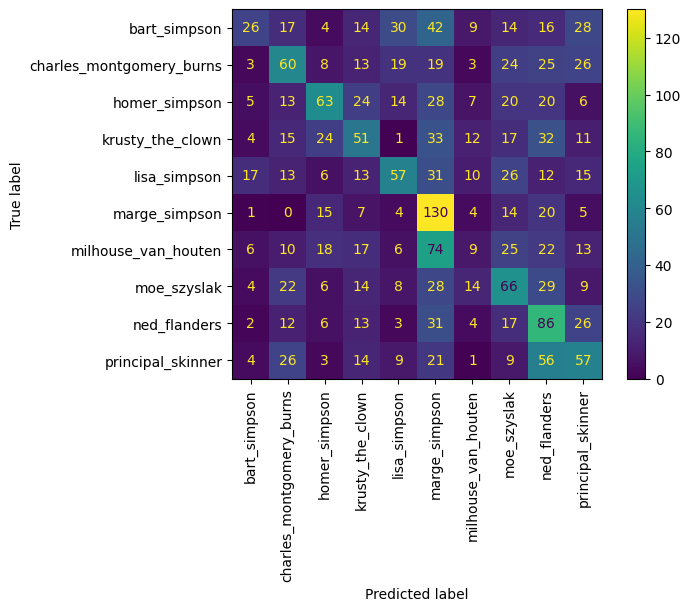

In [98]:
# Confusion matrix
y_pred = model3.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test_a = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test_a, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=list(convert_dict.keys()))
cmd.plot()
_ = plt.xticks(rotation=90)

After fitting the model a few times, the highest precision class was always homer_simpson and the highest sensitivity class was always Max marge_simpson.

In [100]:
precision_per_class = {}
sensitivity_per_class = {}
specificity_per_class = {}

# Calculate precision, sensitivity, specificity for each class
for i in range(len(cm)):
    TP = cm[i, i]  # True Positive for class i
    FP = cm[:, i].sum() - TP  # False Positive for class i
    FN = cm[i, :].sum() - TP  # False Negative for class i
    TN = cm.sum() - (TP + FP + FN)  # True Negative for class i

    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0

    precision_per_class[inverse_convert_dict[i]] = precision
    sensitivity_per_class[inverse_convert_dict[i]] = sensitivity
    specificity_per_class[inverse_convert_dict[i]] = specificity


print("Precision per class:")
print(precision_per_class)
max_class = max(precision_per_class, key=precision_per_class.get)
max_precision_value = precision_per_class[max_class]
print("Max",max_class,max_precision_value)

print("\nSensitivity per class (Recall):")
print(sensitivity_per_class)
max_class = max(sensitivity_per_class, key=sensitivity_per_class.get)
max_sensitivity_value = sensitivity_per_class[max_class]
print("Max",max_class,max_sensitivity_value)

print("\nSpecificity per class:")
print(specificity_per_class)
max_class = max(specificity_per_class, key=specificity_per_class.get)
max_specificity_value = specificity_per_class[max_class]
print("Max",max_class,max_specificity_value)


macro_precision = np.mean(list(precision_per_class.values()))
macro_sensitivity = np.mean(list(sensitivity_per_class.values()))
macro_specificity = np.mean(list(specificity_per_class.values()))

print("\nMacro-averaged Precision:", macro_precision)
print("Macro-averaged Sensitivity (Recall):", macro_sensitivity)
print("Macro-averaged Specificity:", macro_specificity)



Precision per class:
{'bart_simpson': 0.3611111111111111, 'charles_montgomery_burns': 0.3191489361702128, 'homer_simpson': 0.4117647058823529, 'krusty_the_clown': 0.2833333333333333, 'lisa_simpson': 0.37748344370860926, 'marge_simpson': 0.2974828375286041, 'milhouse_van_houten': 0.1232876712328767, 'moe_szyslak': 0.28448275862068967, 'ned_flanders': 0.27044025157232704, 'principal_skinner': 0.29081632653061223}
Max homer_simpson 0.4117647058823529

Sensitivity per class (Recall):
{'bart_simpson': 0.13, 'charles_montgomery_burns': 0.3, 'homer_simpson': 0.315, 'krusty_the_clown': 0.255, 'lisa_simpson': 0.285, 'marge_simpson': 0.65, 'milhouse_van_houten': 0.045, 'moe_szyslak': 0.33, 'ned_flanders': 0.43, 'principal_skinner': 0.285}
Max marge_simpson 0.65

Specificity per class:
{'bart_simpson': 0.9744444444444444, 'charles_montgomery_burns': 0.9288888888888889, 'homer_simpson': 0.95, 'krusty_the_clown': 0.9283333333333333, 'lisa_simpson': 0.9477777777777778, 'marge_simpson': 0.82944444444

Looking at the predictions, we can see that some classes were more often predicted, so when altering the images its good to note that if we are trying to see if the model also works on the altered images, if the chosen image belongs to a more predicted class, it might give us false information. E.g. marge_simpson is always a lot more predicted.

In [101]:
# Get unique values and their counts in y_pred
unique, counts = np.unique(y_pred, return_counts=True)

print("Class-wise prediction distribution:")
for label, count in zip(unique, counts):
    print(f"'{inverse_convert_dict[label]}' predicted {count} times")


max_count_index = np.argmax(counts)
max_label = unique[max_count_index]
max_count = counts[max_count_index]

print(f"Max: '{inverse_convert_dict[max_label]}' predicted {max_count} times")


Class-wise prediction distribution:
'bart_simpson' predicted 72 times
'charles_montgomery_burns' predicted 188 times
'homer_simpson' predicted 153 times
'krusty_the_clown' predicted 180 times
'lisa_simpson' predicted 151 times
'marge_simpson' predicted 437 times
'milhouse_van_houten' predicted 73 times
'moe_szyslak' predicted 232 times
'ned_flanders' predicted 318 times
'principal_skinner' predicted 196 times
Max: 'marge_simpson' predicted 437 times


## Rotate / zoom in image

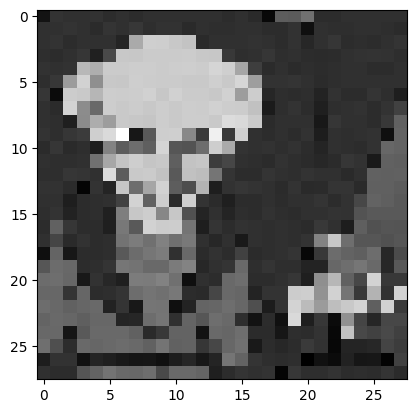

Label = charles_montgomery_burns
1/1 [==============================] - 0s 35ms/step
Prediction =  charles_montgomery_burns


In [ ]:
index = 232
X_set = X_test
y_set = y_test
plt.imshow(X_test[index], cmap="gray")
plt.show()
print("Label =", inverse_convert_dict[np.argmax(y_test[index])])
print("Prediction = ", inverse_convert_dict[np.argmax(model3.predict(X_test[index].reshape(1, 28, 28)))])

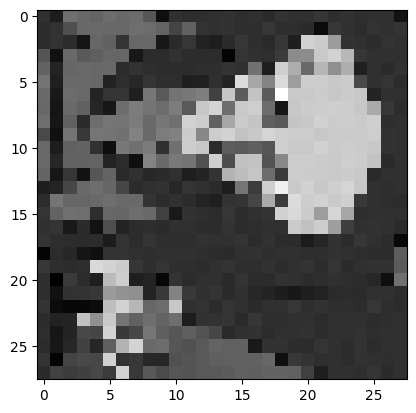

1/1 [==============================] - 0s 36ms/step
Prediction =  charles_montgomery_burns


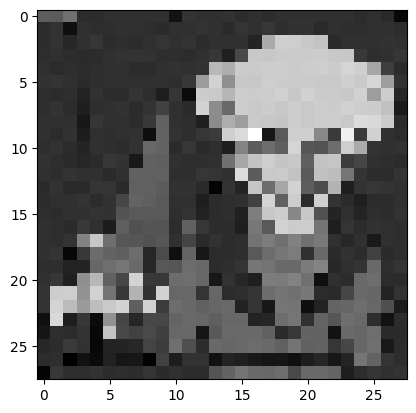

1/1 [==============================] - 0s 39ms/step
Prediction =  krusty_the_clown


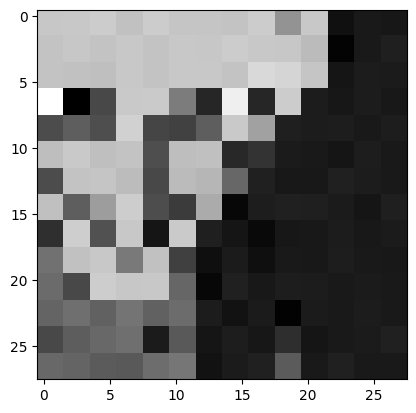

1/1 [==============================] - 0s 31ms/step
Prediction =  lisa_simpson


In [ ]:
rotated_image = np.rot90(X_test[index], k=3)
plt.imshow(rotated_image, cmap="gray")
plt.show()
print("Prediction = ", inverse_convert_dict[np.argmax(model3.predict(rotated_image.reshape(1, 28, 28)))])

moved_image = np.roll(X_test[index], 10, axis=1)
plt.imshow(moved_image, cmap="gray")
plt.show()
print("Prediction = ", inverse_convert_dict[np.argmax(model3.predict(moved_image.reshape(1, 28, 28)))])

zoomed_in_image = np.zeros((28, 28))
for i in range(14):
    for j in range(14):
        zoomed_in_image[2*i][2*j] = X_test[index][6+i][6+j]
        zoomed_in_image[2*i][2*j+1] = X_test[index][6+i][6+j]
        zoomed_in_image[2*i+1][2*j] = X_test[index][6+i][6+j]
        zoomed_in_image[2*i+1][2*j+1] = X_test[index][6+i][6+j]
plt.imshow(zoomed_in_image, cmap="gray")
plt.show()
print("Prediction = ", inverse_convert_dict[np.argmax(model3.predict(zoomed_in_image.reshape(1, 28, 28)))])
